<a href="https://colab.research.google.com/github/AlvinAditiya117/PCVK25_3F_04/blob/main/Week6_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alvin Aditiya 3F 04 2341720020

#**PRAKTIKUM FILTER**

**Mount Google Drive dan Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


Mounted at /content/drive


**Fungsi Konvolusi Manual**

In [ ]:
def convolution(image, kernel):
    img_height, img_width = image.shape
    k_height, k_width = kernel.shape
    pad_h, pad_w = k_height // 2, k_width // 2

    # Padding citra
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Inisialisasi hasil
    output = np.zeros_like(image, dtype=float)

    # Proses konvolusi
    for i in range(img_height):
        for j in range(img_width):
            region = padded[i:i+k_height, j:j+k_width]
            output[i, j] = np.sum(region * kernel)

    # Normalisasi ke 0-255
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)


**Load Gambar dari Drive dan Ubah ke Grayscale**

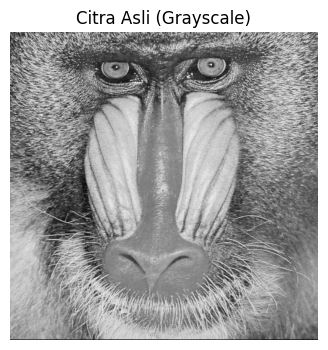

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_04/mandrill.tiff'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title('Citra Asli (Grayscale)')
plt.axis('off')
plt.show()


**Definisikan Kernel Filter**

In [ ]:
# Average filter
avg_kernel = np.ones((3,3), np.float32) / 9

# Low Pass Filter
low_pass_kernel = np.array([[1,1,1],
                            [1,4,1],
                            [1,1,1]], np.float32) / 12

# High Pass Filter
high_pass_kernel = np.array([[-1,0,1],
                             [-1,0,3],
                             [-3,0,1]], np.float32)

# Sharpen
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]], np.float32)

# Emboss
emboss_kernel = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]], np.float32)

# Sobel Edge Detection
sobel_kernel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]], np.float32)

# Canny-like Edge Detection (Laplacian)
canny_kernel = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]], np.float32)


**Terapkan Fungsi Konvolusi untuk Setiap Filter**

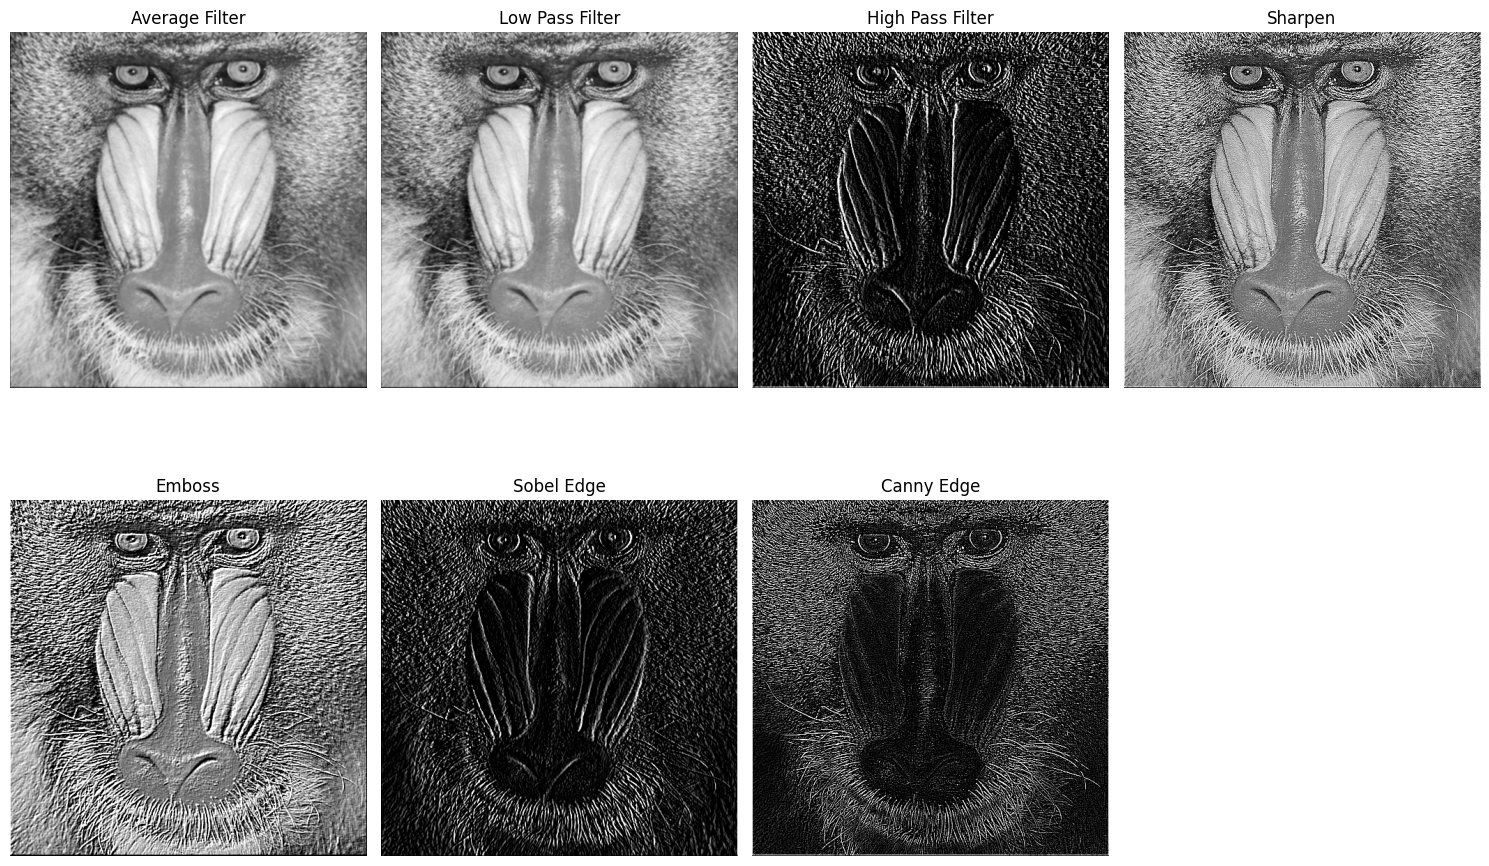

In [ ]:
filters = {
    "Average Filter": avg_kernel,
    "Low Pass Filter": low_pass_kernel,
    "High Pass Filter": high_pass_kernel,
    "Sharpen": sharpen_kernel,
    "Emboss": emboss_kernel,
    "Sobel Edge": sobel_kernel,
    "Canny Edge": canny_kernel
}

plt.figure(figsize=(15,10))
for idx, (name, kernel) in enumerate(filters.items()):
    result = convolution(img, kernel)
    plt.subplot(2, 4, idx+1)
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()


**Gaussian Blur 21×21**

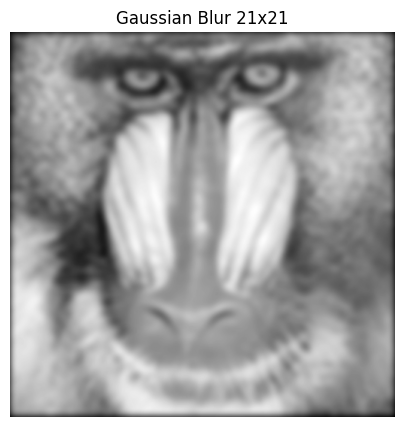

In [ ]:
kernel_size = 21
sigma = math.sqrt(kernel_size)

gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel = gaussian_kernel_1d @ gaussian_kernel_1d.T

gaussian_blur = convolution(img, gaussian_kernel)

plt.figure(figsize=(5,5))
plt.title("Gaussian Blur 21x21")
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')
plt.show()


#**FILTER LIBRARY DAN FILTER MODERN**